In [60]:
import pandas as pd

In [61]:
# importando os dados
bandeiras = pd.read_csv('flags.csv')
bandeiras.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [62]:
#visualizando a dimensão do Dataset
bandeiras.shape

(194, 30)

In [63]:
#visualizando os tipos de dados contidos no Dataset
bandeiras.dtypes

name          object
landmass       int64
zone           int64
area           int64
population     int64
language       int64
religion       int64
bars           int64
stripes        int64
colours        int64
red            int64
green          int64
blue           int64
gold           int64
white          int64
black          int64
orange         int64
mainhue       object
circles        int64
crosses        int64
saltires       int64
quarters       int64
sunstars       int64
crescent       int64
triangle       int64
icon           int64
animate        int64
text           int64
topleft       object
botright      object
dtype: object

# 1.A Verificando bandeiras de países que tenham as mesmas cores da bandeira do Brasil, sendo verde, amarelo, azul e branco.#

  total de 22 países, incluindo o Brasil.

In [64]:
#Quem tem cores verdes, amarelas, azuis e brancas na bandeira?
verde = bandeiras['green']
amarelo = bandeiras['gold']
azul = bandeiras['blue']
branco = bandeiras['white']

#Somando todas as cores para localização dos paises
soma = verde + amarelo + azul + branco

#verificando quem tem as quatro cores na bandeira
todas_as_cores = (soma==4)
bandeiras[todas_as_cores]['name']

17                       Belize
19                      Bermuda
23                       Brazil
24         British-Virgin-Isles
26                     Bulgaria
33               Cayman-Islands
34     Central-African-Republic
48                     Dominica
56           Falklands-Malvinas
57                         Fiji
71                         Guam
78                    Hong-Kong
116                  Montserrat
135                     Parguay
139                    Portugal
142                     Romania
151             Soloman-Islands
158                   St-Helena
161                  St-Vincent
176         Turks-Cocos-Islands
182             US-Virgin-Isles
187                   Venezuela
Name: name, dtype: object

In [65]:
#Estudando a base de dados flags 
    # I. Propriedades básicas de cada atributo

i=0
for c in bandeiras.columns:
  i +=1
  att = bandeiras[c]                  #atributo
  att_dtype = att.dtype               #dtype
  att_tam_dominio = att.unique().size #tamanho do domínio (valores ou categorias distintas) do atributo.

  att_tem_nulo = any(att.isnull())    #possui valor nulo?

  #Caso o domínio do atributo possua 8 ou menos elementos, então são impressos todos os seus valores ou categorias.
  if (att_tam_dominio < 8):
    print("("+str(i)+") atributo:", c, "\t", 
    "dtype:", att_dtype, "\t", 
    "nulos: ", att_tem_nulo, "\n", 
    "domínio:", att.unique())
  
  #Caso o domínio do atributo possua mais de 8 elementos e o seu dtype seja object , 
  #são impressas apenas as suas 8 primeiras categorias.
  else: 
    if (att_dtype=='object'): 
      print("("+str(i)+") atributo:", c, "\t", 
      "dtype:", att_dtype, "\t", 
      "nulos: ", att_tem_nulo, "\n", 
      "domínio (primeiros elementos):", att.unique()[0 :8]) 
  
  #Caso o domínio do atributo possua mais de 8 elementos e o seu dtype não seja object (ou seja, o atributo é numérico), 
  #são impressos os valores mínimo, máximo, médio e o desvio padrão.
    else: 
      print("("+str(i)+") atributo:", c, "\t", 
      "dtype:", att_dtype, "\t", 
      "nulos: ", att_tem_nulo, "\n", 
      "min: ", att.min(), "\t", 
      "max: ", att.max(), "\t", 
      "média: ", round(att.mean(),2), "\t", 
      "d.p.: ", round(att.std(),2))

(1) atributo: name 	 dtype: object 	 nulos:  False 
 domínio (primeiros elementos): ['Afghanistan' 'Albania' 'Algeria' 'American-Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua-Barbuda']
(2) atributo: landmass 	 dtype: int64 	 nulos:  False 
 domínio: [5 3 4 6 1 2]
(3) atributo: zone 	 dtype: int64 	 nulos:  False 
 domínio: [1 3 2 4]
(4) atributo: area 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  22402 	 média:  700.05 	 d.p.:  2170.93
(5) atributo: population 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  1008 	 média:  23.27 	 d.p.:  91.93
(6) atributo: language 	 dtype: int64 	 nulos:  False 
 min:  1 	 max:  10 	 média:  5.34 	 d.p.:  3.5
(7) atributo: religion 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  7 	 média:  2.19 	 d.p.:  2.06
(8) atributo: bars 	 dtype: int64 	 nulos:  False 
 domínio: [0 2 3 1 5]
(9) atributo: stripes 	 dtype: int64 	 nulos:  False 
 min:  0 	 max:  14 	 média:  1.55 	 d.p.:  2.33
(10) atributo: colours 	 dtype: int64 	 nulos:  False 
 min:  1 

In [66]:
#II. Cores e suas frequências nas bandeiras
    #(2)-Gera a tabela de frequências

df_cores = pd.DataFrame()
for c in bandeiras.columns: 
  if c in ['red','green','blue','gold','white','black','orange' ]: 
    df_cores[c] = bandeiras[c].value_counts() 
    
print(df_cores) #o programa computa a frequência dos valores 0 (ausência da cor na bandeira) ou 1 (presença da cor).

#E aqui está a saída. Podemos ver que vermelho ( red ) é a cor mais frequente, ocorrendo em 153 das 194 bandeiras. 
#A segunda mais frequente é a cor branca ( white ), presente em 146 bandeiras. 
#E a menos frequente, a cor laranja ( orange ) que está em apenas 26 bandeiras.

   red  green  blue  gold  white  black  orange
1  153     91    99    91    146     52      26
0   41    103    95   103     48    142     168


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f0ec131d0>,
      dtype=object)

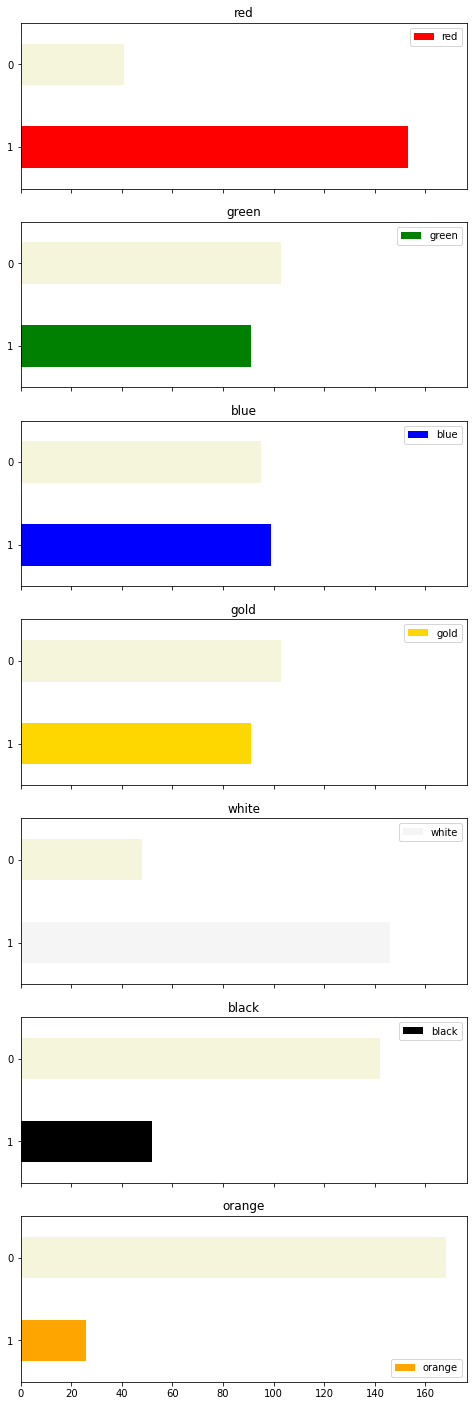

In [67]:
#Gráficos de barras com as frequências das cores.
  #(3)-Gera os gráficos de barras

lst_cores = [['red','beige'], 
             ['green','beige'], 
             ['blue','beige'], 
             ['gold','beige'], 
             ['whitesmoke','beige'], 
             ['black','beige'], 
             ['orange','beige']]

df_cores.plot(kind='barh', 
              subplots=True, 
              figsize=(8,25), 
              color = lst_cores)

#a cor bege ( beige ) na barra referente ao valor 0 (ausência de cor) 
#e a própria cor para a barra que representa o valor 1 (presença da cor).

## objetivo será descobrir quais são os países comuns a estas duas fontes de informação.



*   Verificar quais países fazem parte de ambas as bases, usando a junção interna;
*   Verificar quais países fazem parte apenas de flags.csv , utilizando o left join;
*   Verificar quais países fazem parte apenas de countries.csv , utilizando o right join;



In [68]:
#Comparação entre as bases flags.csv e countries.csv

bandeiras # dados já lidos

paises = pd.read_csv('countries.csv')
paises

,country,pop_country,area_country
0,Afghanistan,31056997,647500
1,Albania,3581655,28748
2,Algeria,32930091,2381740
3,American-Samoa,57794,199
4,Andorra,71201,468
...,...,...,...
222,Wallis and Futuna,16025,274
223,West Bank,2460492,5860
224,Western Sahara,273008,266000
225,Zambia,11502010,752614


In [69]:
# Junção Interna: países comuns a ambas as bases

dados = pd.merge(bandeiras, paises, how= 'inner', left_on='name', right_on='country')
dados.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,country,pop_country,area_country
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green,Afghanistan,31056997,647500
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red,Albania,3581655,28748
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white,Algeria,32930091,2381740
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red,American-Samoa,57794,199
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red,Andorra,71201,468


In [70]:
qtd_bandeira = bandeiras.shape[0]
qtd_bandeira

qtd_pais = paises.shape[0]
qtd_pais

print(f"Quantidade de bandeiras: {qtd_bandeira}")
print(f"Quantidade de paises: {qtd_pais}")

Quantidade de bandeiras: 194
Quantidade de paises: 227


In [71]:
# Left Join: países apenas em bandeiras

so_bandeiras = pd.merge(bandeiras, paises, how="left", left_on="name", right_on="country")
so_bandeiras = so_bandeiras[pd.isnull(so_bandeiras['country'])==True]

so_bandeiras.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,country,pop_country,area_country
9,Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue,NaN,NaN,NaN
56,Falklands-Malvinas,2,3,12,0,1,1,0,0,6,1,1,1,1,1,0,0,blue,1,1,1,1,0,0,0,1,1,1,white,blue,NaN,NaN,NaN
65,Germany-FRG,3,1,249,61,4,1,0,3,3,1,0,0,1,0,1,0,black,0,0,0,0,0,0,0,0,0,0,black,gold,NaN,NaN,NaN
88,Ivory-Coast,4,4,323,7,3,5,3,0,3,1,1,0,0,1,0,0,white,0,0,0,0,0,0,0,0,0,0,red,green,NaN,NaN,NaN
92,Kampuchea,5,1,181,6,10,3,0,0,2,1,0,0,1,0,0,0,red,0,0,0,0,0,0,0,1,0,0,red,red,NaN,NaN,NaN


In [72]:
# Right Join: países apenas em dados de paises 
so_paises = pd.merge(bandeiras, paises, how="right", left_on="name", right_on="country")
so_paises = so_paises[pd.isnull(so_paises['name'])==True]

so_paises.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,country,pop_country,area_country
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armenia,2976372,29800
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,71891,193
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azerbaijan,7961619,86600
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belarus,10293011,207600
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bosnia-Herzegovina,4498976,51129


# Normalização do dados:



*   Normalizar todos os atributos numéricos para uma faixa comum: [0.0, 1.0];
*   Converter todos os atributos categóricos com k > 2 categorias para k atributos binários;

*   Remover os atributos que não tomarão parte no processo de classificação (por exemplo: remover o atributo original language após o mesmo ter sido transformado em 10 atributos binários).





In [73]:
bandeiras.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [74]:
# transformação da base bandeiras

#(2)-Conversão dos atributos do Grupo 2 (Converter todos os atributos categóricos com 
# k > 2 categorias para k atributos binários;)
# De: Categóricos não binários  Para: Categóricos binários 

for c in bandeiras.columns:
  if c in ['landmass', 'zone',
           'language', 'religion',
           'mainhue', 'topleft',
           'botright']: 
    dummies = pd.get_dummies(bandeiras[c], prefix=c) 

bandeiras = bandeiras.join(dummies)

bandeiras.head()
 

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green,0,0,0,0,1,0,0,0
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red,0,0,0,0,0,0,1,0
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white,0,0,0,0,0,0,0,1
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red,0,0,0,0,0,0,1,0
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red,0,0,0,0,0,0,1,0


In [75]:
##(3)-Normalização dos atributos dos Grupo 3 e 4 (Normalizar todos os atributos numéricos para uma faixa comum: [0.0, 1.0];)
# De: Numéricos contínuos e discretos 
# Para: Numéricos com valores na faixa entre 0 e 1

for c in bandeiras.columns: 
  if c in ['area', 'population',
           'bars', 'stripes',
           'colours', 'circles',
           'crosses', 'saltires',
           'quarters', 'sunstars']: 
    c_max = max(bandeiras[c]) 
    c_min = min(bandeiras[c]) 
    bandeiras[c] = (bandeiras[c] - c_min) / (c_max - c_min)

bandeiras.head() 


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,Afghanistan,5,1,0.028926,0.015873,10,2,0.0,0.214286,0.571429,1,1,0,1,1,1,0,green,0.0,0.0,0.0,0.0,0.02,0,0,1,0,0,black,green,0,0,0,0,1,0,0,0
1,Albania,3,1,0.001295,0.002976,6,6,0.0,0.000000,0.285714,1,0,0,1,0,1,0,red,0.0,0.0,0.0,0.0,0.02,0,0,0,1,0,red,red,0,0,0,0,0,0,1,0
2,Algeria,4,1,0.106598,0.019841,8,2,0.4,0.000000,0.285714,1,1,0,0,1,0,0,green,0.0,0.0,0.0,0.0,0.02,1,0,0,0,0,green,white,0,0,0,0,0,0,0,1
3,American-Samoa,6,3,0.000000,0.000000,1,1,0.0,0.000000,0.571429,1,0,1,1,1,0,1,blue,0.0,0.0,0.0,0.0,0.00,0,1,1,1,0,blue,red,0,0,0,0,0,0,1,0
4,Andorra,3,1,0.000000,0.000000,6,0,0.6,0.000000,0.285714,1,0,1,1,0,0,0,gold,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,blue,red,0,0,0,0,0,0,1,0


In [76]:
#4-Exclusão dos atributos indesejados (Remover os atributos que não tomarão parte no processo de 
#classificação (por exemplo: remover o atributo original language após o mesmo ter sido transformado 
#em 10 atributos binários).)

bandeiras = bandeiras.drop(columns=['name', 'landmass', 'zone', 'language','religion', 'mainhue', 'topleft', 'botright'])

bandeiras.head()


,area,population,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0.028926,0.015873,0.0,0.214286,0.571429,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.02,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0.001295,0.002976,0.0,0.000000,0.285714,1,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.02,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.106598,0.019841,0.4,0.000000,0.285714,1,1,0,0,1,0,0,0.0,0.0,0.0,0.0,0.02,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.000000,0.0,0.000000,0.571429,1,0,1,1,1,0,1,0.0,0.0,0.0,0.0,0.00,0,1,1,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.000000,0.6,0.000000,0.285714,1,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0


In [79]:
#6-Salva o dataset alterado para um arquivo

bandeiras.to_csv("bandeiras_transf.csv", sep=",", index=False)
